In [30]:
import jieba
import os
import wordcloud
import  matplotlib.pyplot as plt
import PIL
import collections

In [2]:
import pandas as pd
import json
import jieba.analyse

In [3]:
filePath = '../docs/comments'
location=os.listdir(filePath)
filePath=filePath+'/'+"陕西"
landMark=os.listdir(filePath)
filePath=filePath+'/'+"西安城墙"

goodOpinions=pd.read_csv(filePath+'/好评.CSV',index_col=0)
goodComments = goodOpinions["评论内容"]


In [4]:
# 创建停用词列表
def get_stopwords_list():
    stopwords = [line.strip() for line in open(os.path.dirname(os.path.abspath('.')) + '/projects/stopwords/stopwords.txt',encoding='UTF-8').readlines()]
    stopwords.append(['',' ','~','…'])
    stopwords=tuple(stopwords)
    return stopwords

In [52]:
jieba.analyse.set_stop_words(os.path.dirname(os.path.abspath('.')) + '/projects/stopwords/stopwords.txt')

In [6]:
stopwords=get_stopwords_list()

In [57]:
segments=[]
jieba.enable_paddle()
for index, row in goodOpinions.iterrows():
    content = row[3]
    #TextRank 关键词抽取，只获取固定词性
    words = jieba.cut(content,use_paddle=True)
    for word in words:
        #停用词判断，如果当前的关键词不在停用词库中才进行记录
        if word not in stopwords:
            # 记录全局分词
            segments.append(word) # 分词追加到列表


Paddle enabled successfully......


In [55]:

segments_order=sorted(segments.items(),key=lambda x:x[1],reverse=True)
segments_order=dict(segments_order)

In [59]:

segments={}
for index, row in goodOpinions.iterrows():
    content = row[3]
    #TextRank 关键词抽取，只获取固定词性
    words = jieba.analyse.textrank(content, topK=100,withWeight=False,allowPOS=('ns', 'n', 'vn', 'nz', 'a'))
    for word in words:
        if word in segments: #直接判断key在不在字典中
            segments[word]+=1
        else:
            segments[word]=1

In [10]:
segments_order=sorted(segments.items(),key=lambda x:x[1],reverse=True)
segments_order

In [85]:
ss=[1,2,3]
for i in ss.iterrows():
    print(i)

AttributeError: 'list' object has no attribute 'iterrows'

In [90]:
ss=[]+
if 1:
    print('1')

1


In [58]:
word_counts = collections.Counter(segments) # 对分词做词频统计
word_counts_top10 = word_counts.most_common(10) # 获取前10最高频的词
dict(word_counts)

{'西安古城墙': 6,
 '门': 34,
 '门票': 22,
 '54': 2,
 '人，': 1,
 '想': 11,
 '城墙': 265,
 '骑': 44,
 '自行车': 54,
 '建议': 16,
 '南北': 1,
 '门上': 4,
 '找到': 2,
 '服务处': 1,
 '很大': 6,
 '交': 2,
 '押金': 14,
 '100': 1,
 '45': 3,
 '单人车': 1,
 '3小时': 11,
 '90': 1,
 '双人车': 3,
 '两个人': 2,
 '玩': 4,
 '话': 13,
 '推荐': 6,
 '双人': 10,
 '车': 23,
 '比较': 12,
 '有趣': 3,
 '带': 5,
 '手套': 2,
 '质量': 2,
 '回磨': 1,
 '手': 2,
 '痛': 1,
 '走路': 3,
 '一定要': 5,
 '看好': 1,
 '时间': 28,
 '想要': 5,
 '下去': 5,
 '一会': 1,
 '二人': 1,
 '骑车': 10,
 '南门': 22,
 '北门': 3,
 '一共': 4,
 '1.5h，': 1,
 '骑行': 14,
 '6.7公里': 1,
 '真': 18,
 '很远': 1,
 '西安': 89,
 '惊人': 1,
 '完整': 17,
 '历朝': 1,
 '历代': 3,
 '依然': 2,
 '壮观': 4,
 '黄昏': 1,
 '时分': 4,
 '租': 31,
 '三个小时': 6,
 '90元': 6,
 '200元': 1,
 '任一': 1,
 '租赁': 8,
 '点': 10,
 '文昌门': 1,
 '登陆': 1,
 '绕': 14,
 '圈': 1,
 '往西': 1,
 '途中': 1,
 '看到': 15,
 '美丽': 2,
 '瞬间': 1,
 '日落，': 1,
 '六点': 2,
 '样子': 2,
 '美': 6,
 '很浪漫 ': 1,
 '一。': 1,
 '700年': 1,
 '历史': 24,
 '。二，政府': 1,
 '曲江文化产业集团': 1,
 '护城河': 3,
 '环城公园': 3,
 '做': 4,
 '大量': 1,
 '投资': 1,
 '维护': 1,
 

In [27]:
ss=segments_order.keys()
list(ss)

['城墙',
 '西安',
 '自行车',
 '走',
 '骑',
 ' ',
 '门',
 '租',
 '时间',
 '古城墙',
 '历史',
 '一圈',
 '车',
 '门票',
 '南门',
 '城门',
 '永宁门',
 '古代',
 '墙',
 '真',
 '保存',
 '中国',
 '选择',
 '完整',
 '完',
 '晚上',
 '建议',
 '长',
 '看到',
 '押金',
 '骑行',
 '绕',
 '特别',
 '感觉',
 '没',
 '宽',
 '话',
 '也是',
 '时',
 '游览',
 '演出',
 '比较',
 '规模',
 '一辆',
 '只能',
 '步行',
 '租车',
 '拍',
 '想',
 '3小时',
 '中',
 '最大',
 '现在',
 '都是',
 '100元',
 '里',
 '文化',
 '西安 城墙',
 '双人',
 '骑车',
 '点',
 '四个',
 '新',
 '54元',
 '白天',
 '应该',
 '太',
 '45元',
 '下来',
 '现存',
 '建筑',
 '位于',
 '登上',
 '包括',
 '上面',
 '~',
 '地方',
 '长安城',
 '租赁',
 '风景',
 '旅游',
 '14公里',
 '方便',
 '古城区',
 '感受',
 '灯光',
 '来到',
 '景点',
 '。 ',
 '出',
 '一下',
 '钟楼',
 '夜景',
 '逛',
 '整个',
 '），',
 '称',
 '已有',
 '周长',
 '外',
 '夜晚',
 '朱雀',
 '一座',
 '觉得',
 '需要',
 '景区',
 '城市',
 '古城',
 '碑林',
 '西安古城墙',
 '很大',
 '推荐',
 '三个小时',
 '90元',
 '美',
 '宏伟',
 '买',
 '停',
 '走走',
 '全长',
 '说',
 '18座',
 '18米',
 '中心',
 '单人',
 '春节',
 '漂亮',
 '灯会',
 '路',
 '东门',
 '西门',
 '似乎',
 '进入',
 '青砖',
 '发现',
 '更',
 '直接',
 '开放',
 '注意',
 '含',
 '带',
 '一定要',
 '想要',
 '下去',
 '完

In [61]:
my_wordcloud = wordcloud.WordCloud(scale=4,font_path="./SimHei.ttf",stopwords=stopwords,background_color='white',
                         max_words = 50,max_font_size = 100,random_state=20,width=300,height=300).generate_from_frequencies(segments_order)

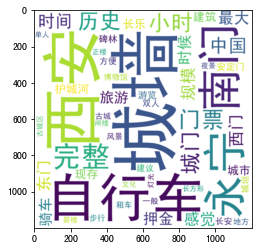

In [65]:

plt.figure()
plt.imshow(my_wordcloud)

In [66]:
my_wordcloud.to_file('/Users/terrensou/Desktop/1.png')

In [60]:
segments_order

{'城墙': 66,
 '西安': 47,
 '自行车': 33,
 '南门': 24,
 '永宁': 23,
 '完整': 17,
 '门票': 17,
 '小时': 16,
 '历史': 15,
 '城门': 15,
 '中国': 15,
 '时间': 13,
 '规模': 12,
 '西门': 12,
 '最大': 11,
 '感觉': 11,
 '东门': 11,
 '押金': 10,
 '时候': 10,
 '骑车': 9,
 '旅游': 9,
 '护城河': 9,
 '建筑': 9,
 '现存': 9,
 '长乐': 9,
 '城市': 9,
 '安定门': 9,
 '碑林': 9,
 '游览': 9,
 '建议': 8,
 '双人': 8,
 '方便': 8,
 '城垣': 8,
 '长安': 8,
 '一般': 7,
 '风景': 7,
 '博物馆': 7,
 '步行': 7,
 '租车': 7,
 '地方': 7,
 '古城': 7,
 '单人': 6,
 '闸楼': 6,
 '箭楼': 6,
 '正楼': 6,
 '古城区': 6,
 '长方形': 6,
 '灯光': 6,
 '文化': 6,
 '夜景': 6,
 '大家': 6,
 '北门': 5,
 '环城': 5,
 '完好': 5,
 '角楼': 5,
 '灯会': 5,
 '周长': 5,
 '中心': 5,
 '联票': 5,
 '漂亮': 5,
 '灯笼': 5,
 '景点': 5,
 '敌楼': 5,
 '景区': 5,
 '原因': 5,
 '美景': 5,
 '很大': 4,
 '公园': 4,
 '意义': 4,
 '宏伟': 4,
 '全长': 4,
 '经历': 4,
 '皇城': 4,
 '基础': 4,
 '民国': 4,
 '半价': 4,
 '彩灯': 4,
 '布置': 4,
 '古都': 4,
 '单车': 4,
 '青砖': 4,
 '兵马俑': 4,
 '军事设施': 4,
 '吊桥': 4,
 '垛口': 4,
 '女儿墙': 4,
 '有趣': 3,
 '西安城': 3,
 '体系': 3,
 '游人': 3,
 '时期': 3,
 '人们': 3,
 '轮廓': 3,
 '电瓶车': 3,
 '时分': 3,
 '体验': 3,
 '繁荣': 3,